### Load Dataset

In [108]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\Santhosh\Desktop\CapstoneProject\Capstone\Banking & Insurance analytics\train.csv")
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


### checking null values 

In [109]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

There is no null values so we can move to next step data preprocessing

### Data preprocessing

In [110]:
df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan'], inplace= True)


In [112]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [113]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder


df['Payment_Behaviour']= df['Payment_Behaviour'].map({'High_spent_Small_value_payments':1, "Low_spent_Small_value_payments":2, 'Low_spent_Medium_value_payments':3, 'Low_spent_Large_value_payments':4, 'High_spent_Medium_value_payments':5, 'High_spent_Large_value_payments': 6})

df['Credit_Score']= LabelEncoder().fit_transform(df[['Credit_Score']])

df['Credit_Mix']= OrdinalEncoder().fit_transform(df[['Credit_Mix']])

df


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1.0,809.98,26.822620,265.0,No,49.574949,21.465380,1,312.494089,0
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1.0,809.98,31.944960,266.0,No,49.574949,21.465380,4,284.629162,0
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1.0,809.98,28.609352,267.0,No,49.574949,21.465380,3,331.209863,0
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,1.0,809.98,31.377862,268.0,No,49.574949,21.465380,2,223.451310,0
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,1.0,809.98,24.797347,269.0,No,49.574949,21.465380,5,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,...,1.0,502.38,34.663572,378.0,No,35.104023,24.028477,6,479.866228,1
99996,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,...,1.0,502.38,40.565631,379.0,No,35.104023,24.028477,5,496.651610,1
99997,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,...,1.0,502.38,41.255522,380.0,No,35.104023,24.028477,6,516.809083,1
99998,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,...,1.0,502.38,33.638208,381.0,No,35.104023,24.028477,4,319.164979,2


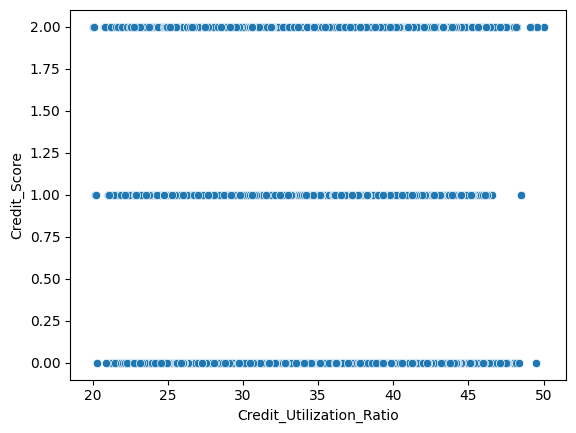

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

scat = sns.scatterplot(data = df, x='Credit_Utilization_Ratio', y='Credit_Score')

In [115]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data= df, x= column)
    plt.title(f'Box plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data= df, x=column, kde=True, bins=50)
    plt.title(f'Distribution plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data= df, x= column)
    plt.title(f'Violin plot for {column}')
    plt.show()

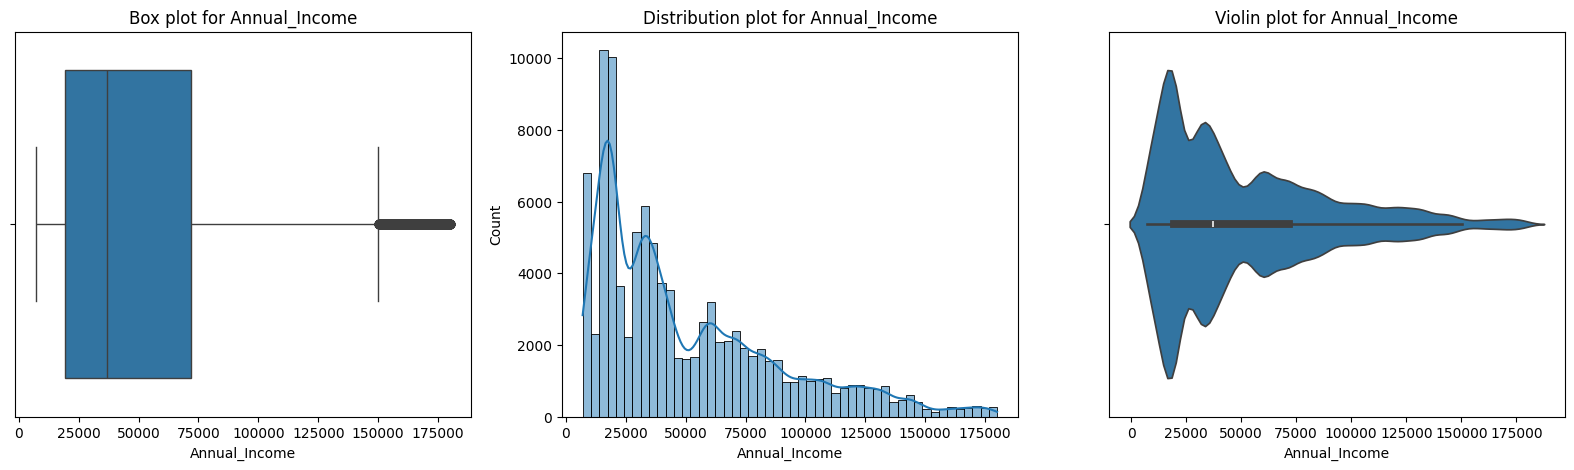

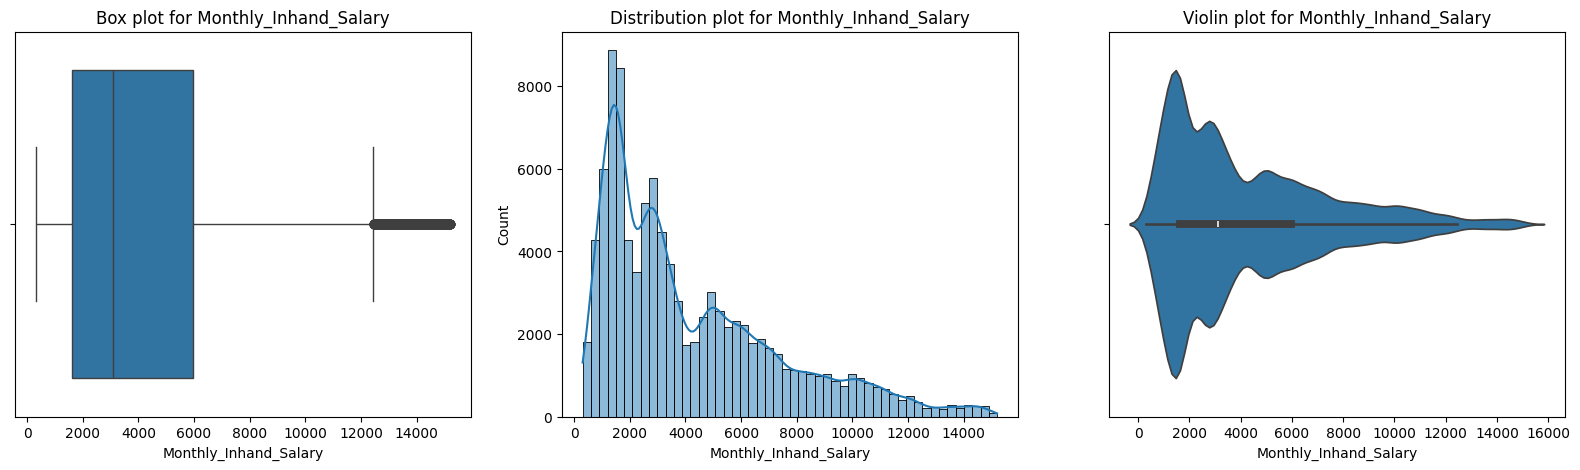

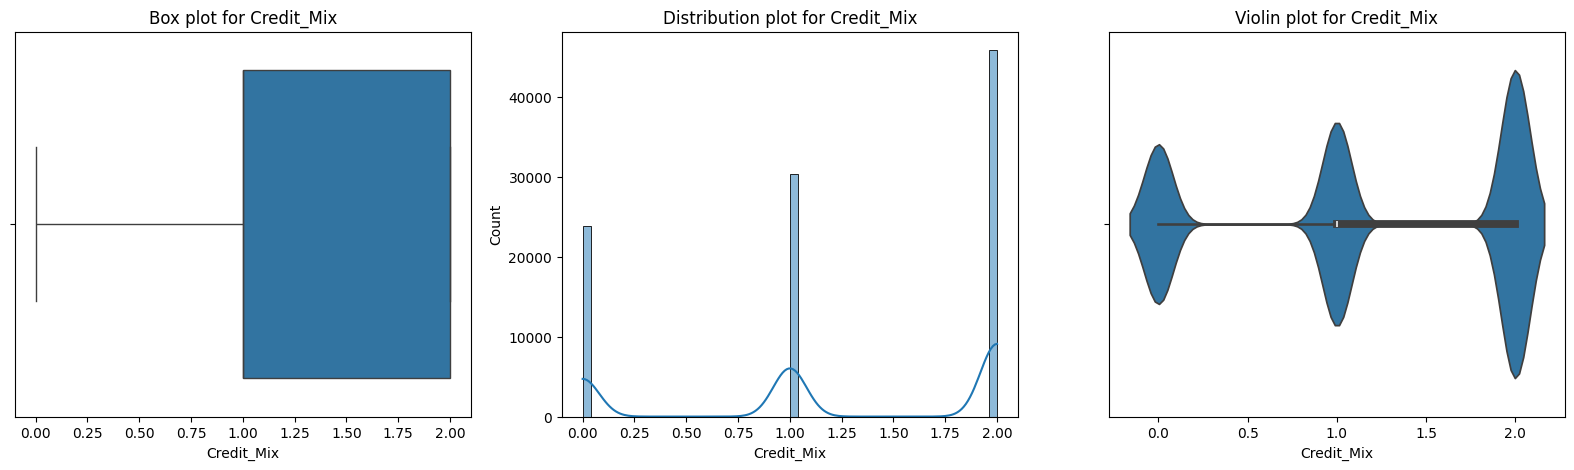

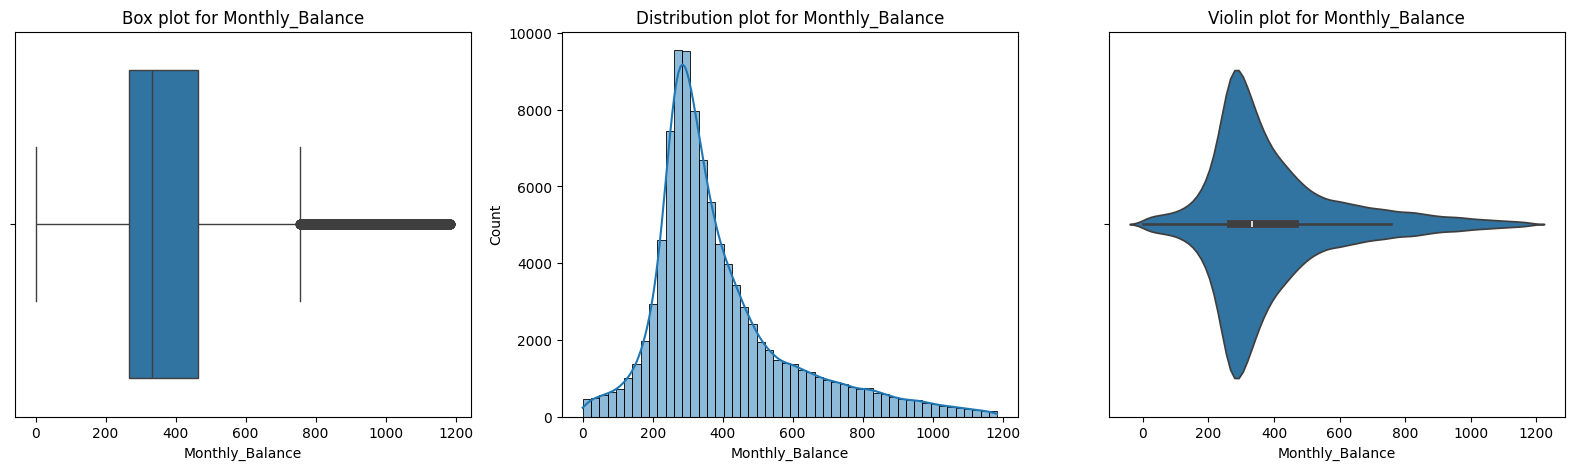

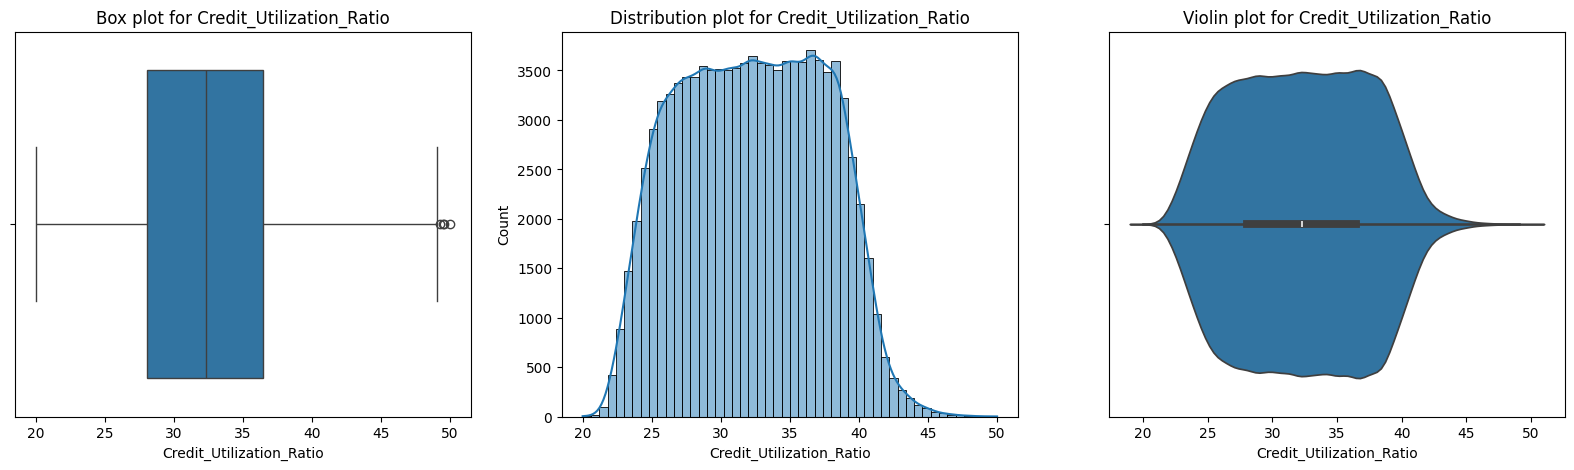

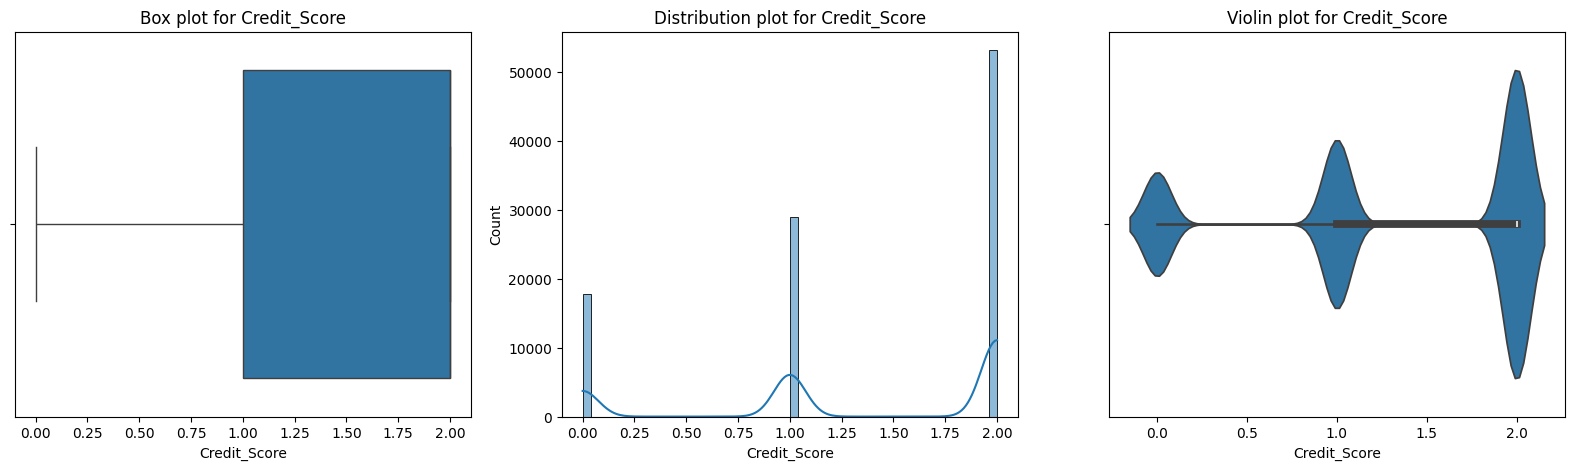

In [116]:
for i in ['Annual_Income','Monthly_Inhand_Salary','Credit_Mix','Monthly_Balance','Credit_Utilization_Ratio','Credit_Score']:
    plot(df, i)

In [117]:
df_1 = df.copy()
df_1

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1.0,809.98,26.822620,265.0,No,49.574949,21.465380,1,312.494089,0
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1.0,809.98,31.944960,266.0,No,49.574949,21.465380,4,284.629162,0
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1.0,809.98,28.609352,267.0,No,49.574949,21.465380,3,331.209863,0
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,1.0,809.98,31.377862,268.0,No,49.574949,21.465380,2,223.451310,0
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,1.0,809.98,24.797347,269.0,No,49.574949,21.465380,5,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,...,1.0,502.38,34.663572,378.0,No,35.104023,24.028477,6,479.866228,1
99996,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,...,1.0,502.38,40.565631,379.0,No,35.104023,24.028477,5,496.651610,1
99997,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,...,1.0,502.38,41.255522,380.0,No,35.104023,24.028477,6,516.809083,1
99998,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,...,1.0,502.38,33.638208,381.0,No,35.104023,24.028477,4,319.164979,2


In [118]:
df_1.drop(columns=['Occupation', 'Payment_of_Min_Amount'],inplace= True)
df_1

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,1.0,809.98,26.822620,265.0,49.574949,21.465380,1,312.494089,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,4.0,1.0,809.98,31.944960,266.0,49.574949,21.465380,4,284.629162,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,1.0,809.98,28.609352,267.0,49.574949,21.465380,3,331.209863,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,4.0,1.0,809.98,31.377862,268.0,49.574949,21.465380,2,223.451310,0
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,4.0,1.0,809.98,24.797347,269.0,49.574949,21.465380,5,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,3.0,1.0,502.38,34.663572,378.0,35.104023,24.028477,6,479.866228,1
99996,5,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,3.0,1.0,502.38,40.565631,379.0,35.104023,24.028477,5,496.651610,1
99997,6,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,3.0,1.0,502.38,41.255522,380.0,35.104023,24.028477,6,516.809083,1
99998,7,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,3.0,1.0,502.38,33.638208,381.0,35.104023,24.028477,4,319.164979,2


In [119]:
def outliers(df, column):
    iqr= df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_thershold= df[column].quantile(0.75) + (1.5*iqr)
    lower_thershold= df[column].quantile(0.25) - (1.5*iqr)
    df[column]=df[column].clip(lower_thershold, upper_thershold)

In [120]:
outliers(df_1, 'Annual_Income')
outliers(df_1, 'Monthly_Inhand_Salary')
outliers(df_1, 'Credit_Mix')
outliers(df_1, 'Monthly_Balance')
outliers(df_1, 'Credit_Utilization_Ratio')
outliers(df_1, 'Credit_Score')

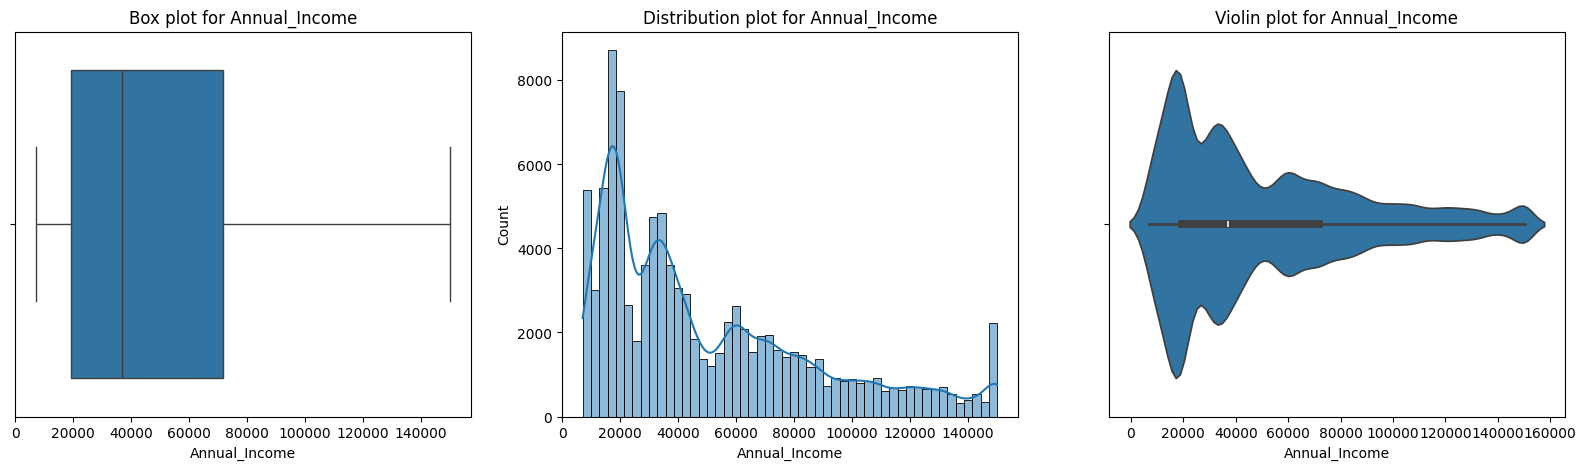

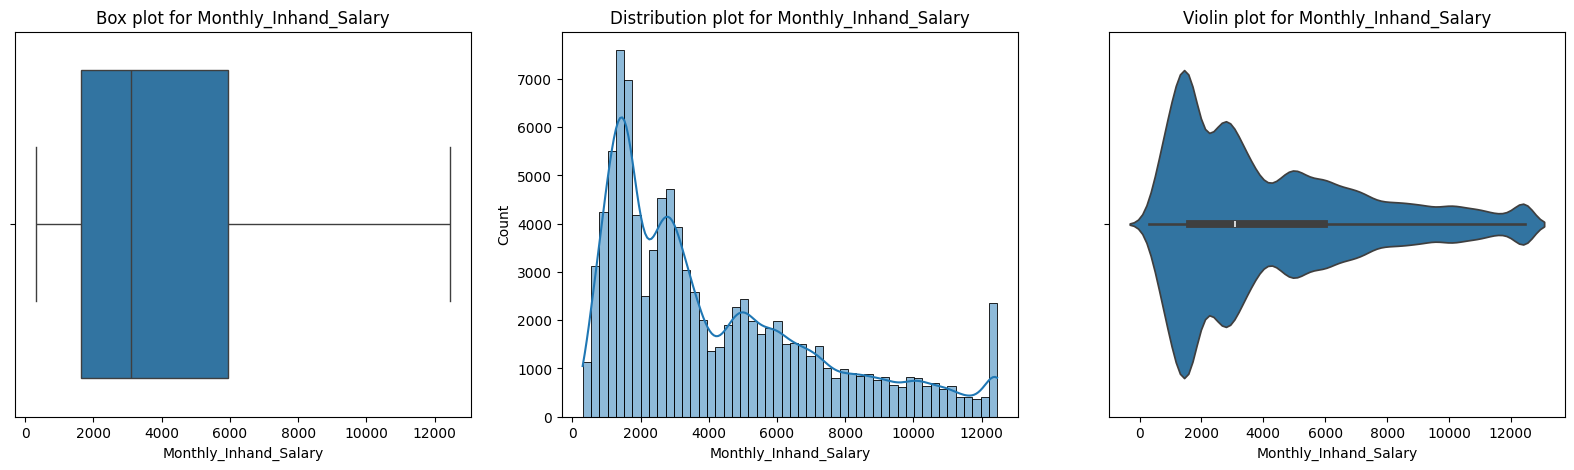

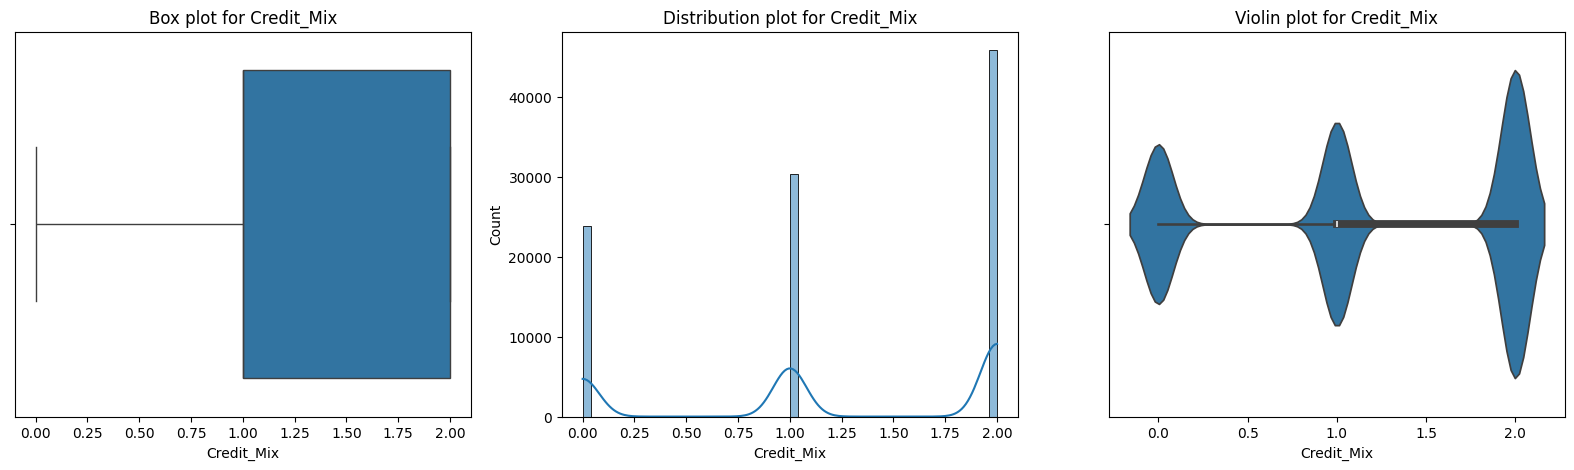

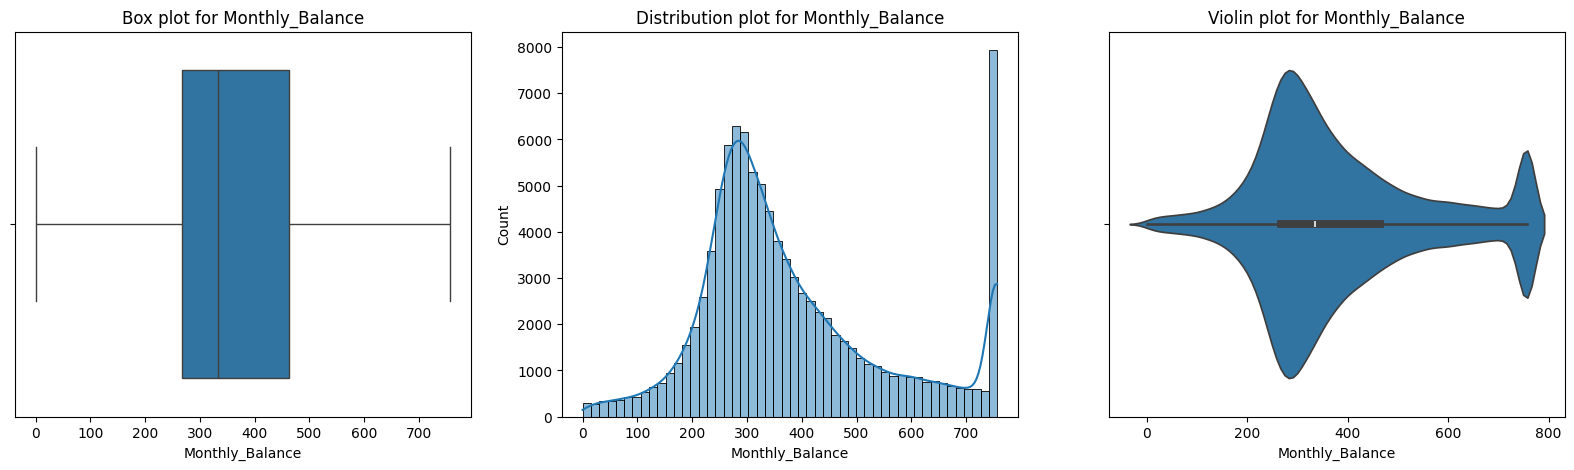

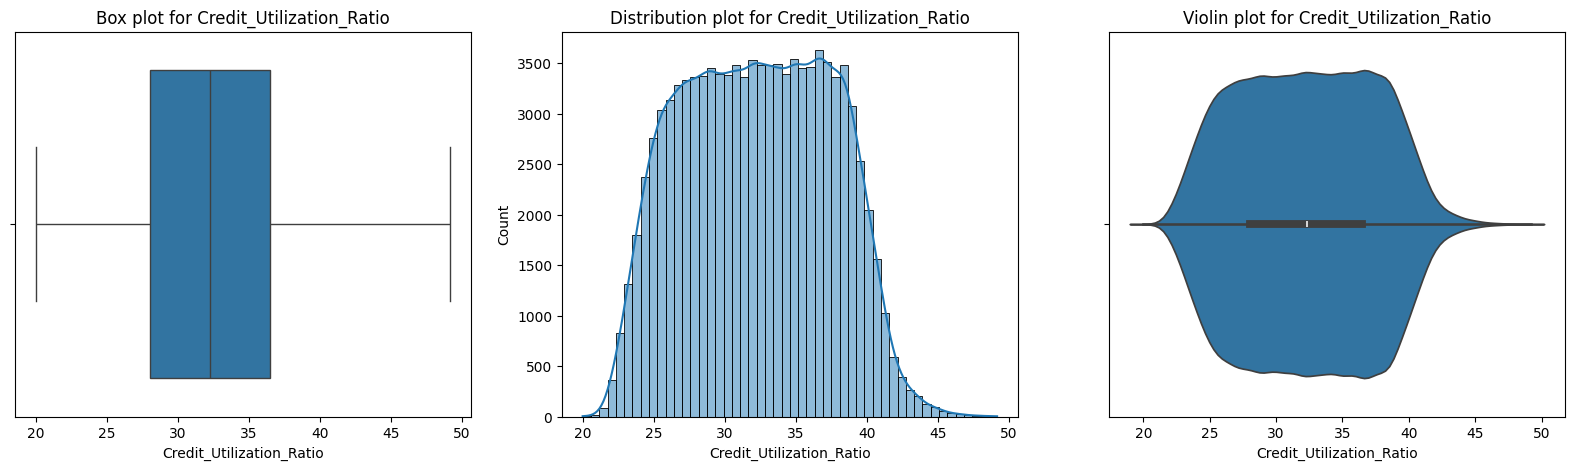

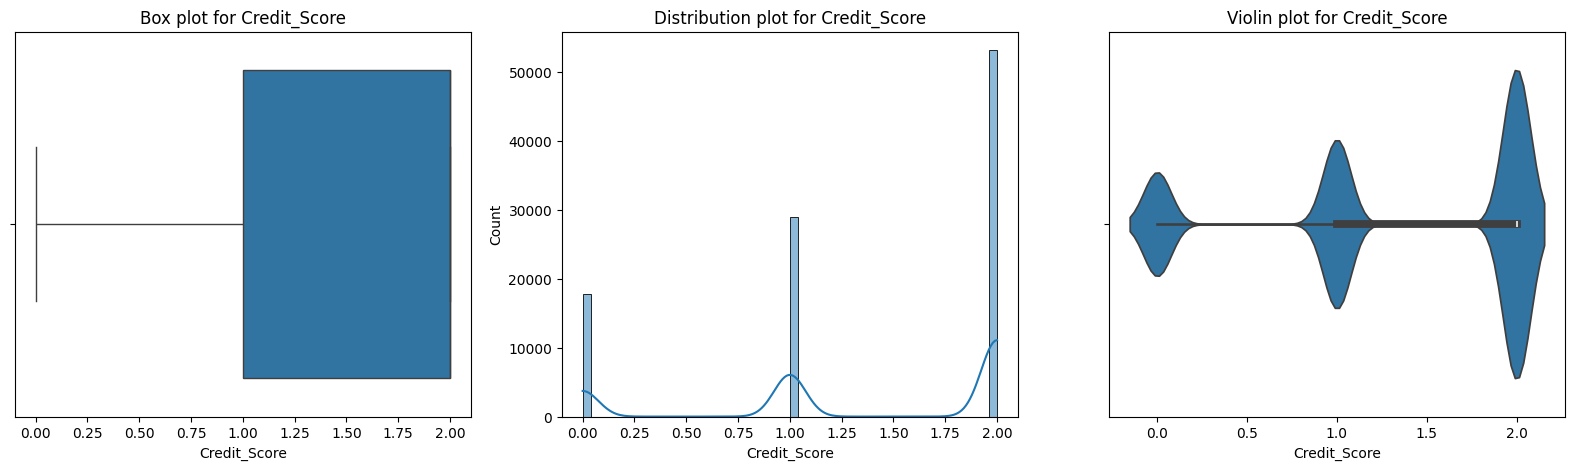

In [121]:
for i in ['Annual_Income','Monthly_Inhand_Salary','Credit_Mix','Monthly_Balance','Credit_Utilization_Ratio','Credit_Score']:
    plot(df_1, i)

<Axes: >

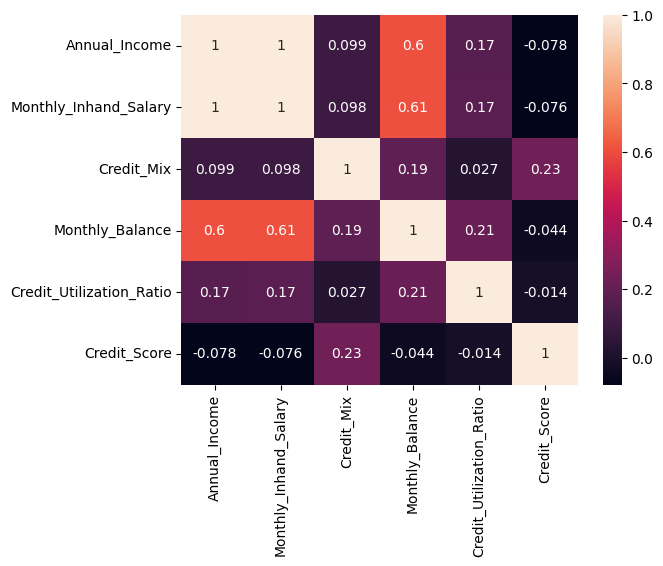

In [122]:
col = ['Annual_Income','Monthly_Inhand_Salary','Credit_Mix','Monthly_Balance','Credit_Utilization_Ratio','Credit_Score']
df_heatmap = df_1[col].corr()
sns.heatmap(df_heatmap, annot= True)


In [123]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [124]:
# Splitting the data into features and target variable
target_col = 'Credit_Score'

x=df_1.drop('Credit_Score', axis=1)
y= df_1['Credit_Score']

x_new, y_new = SMOTETomek(). fit_resample(x,y)



In [126]:
x.shape, y.shape, x_new.shape, y_new.shape

((100000, 20), (100000,), (149016, 20), (149016,))

In [127]:
# checking the accuracy of training & testing usins metrics

def ML_Classifier (x_new, y_new, algorithm):
    x_train,x_test,y_train,y_test= train_test_split(x_new, y_new, train_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    accuracy_metrics = {"algorithm" : algorithm.__name__,
                        "accuracy_train": accuracy_train,
                        "accuracy_test": accuracy_test} #algorithm._name_ to return the algorith name.
    
    return accuracy_metrics

In [128]:
print(ML_Classifier(x_new, y_new, DecisionTreeClassifier))
print(ML_Classifier(x_new, y_new, ExtraTreesClassifier))
print(ML_Classifier(x_new, y_new, RandomForestClassifier))
print(ML_Classifier(x_new, y_new, AdaBoostClassifier))
print(ML_Classifier(x_new, y_new, GradientBoostingClassifier))
print(ML_Classifier(x_new, y_new, XGBClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.7612760353317172}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.8553345692164445}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.8485735616082138}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.7421064993457035, 'accuracy_test': 0.7409762358132083}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.7803241284434453, 'accuracy_test': 0.7719208475585716}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.9223232560480489, 'accuracy_test': 0.8309580331004169}


In [129]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

param_grid = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [131]:
# evaluate all the parameter combinations and return the best parameters based on score
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [133]:
grid_search.best_score_

0.8712042563985921

In [134]:
# passing the parameters to RandomForest algorithm and check the accuracy for training & testing

x_train,x_test,y_train,y_test= train_test_split(x_new,y_new,test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=20,max_features='log2',min_samples_leaf=1,min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9436382243398316, 0.8773319017581532)

In [135]:
# predict the status and check the accuracy using metrics


x_train,x_test,y_train,y_test= train_test_split(x_new,y_new,test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=20,max_features='log2',min_samples_leaf=1,min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_true= y_test, y_pred= y_pred))
print(classification_report(y_true= y_test, y_pred= y_pred))

[[9988   79  342]
 [ 568 8975  377]
 [1266  986 7223]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     10409
           1       0.89      0.90      0.90      9920
           2       0.91      0.76      0.83      9475

    accuracy                           0.88     29804
   macro avg       0.88      0.88      0.88     29804
weighted avg       0.88      0.88      0.88     29804



In [136]:
# Reciver Operating Characterstic curve( ROC ), Area Under Curve( AUC)

FP,TP, threshold = roc_curve(y_true= y_test, y_score= y_pred)
auc_curve= auc(x= FP,y= TP)
print(auc_curve)

ValueError: multiclass format is not supported